# 1 Set up Data for Computer Vision

Learning about computer vision and how this works with Torch

In [ ]:
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#Import matplotlib for visualisaion
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.0.1+cu118
torchvision version: 0.15.2+cu118


In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape


torch.Size([1, 28, 28])

In [ ]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
# Class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

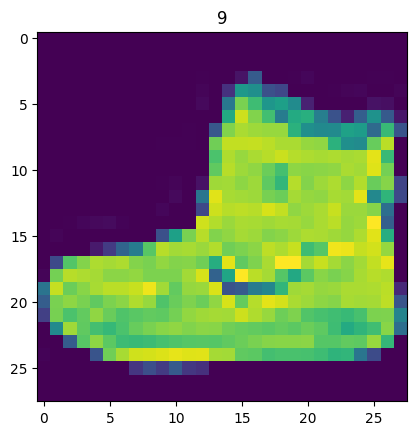

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

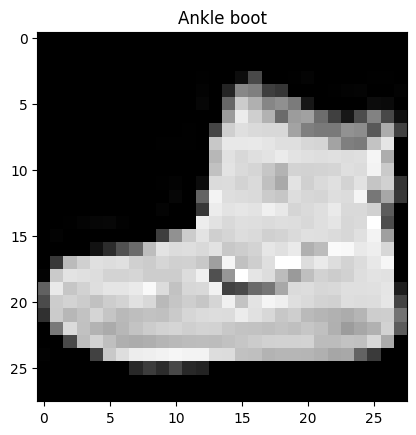

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

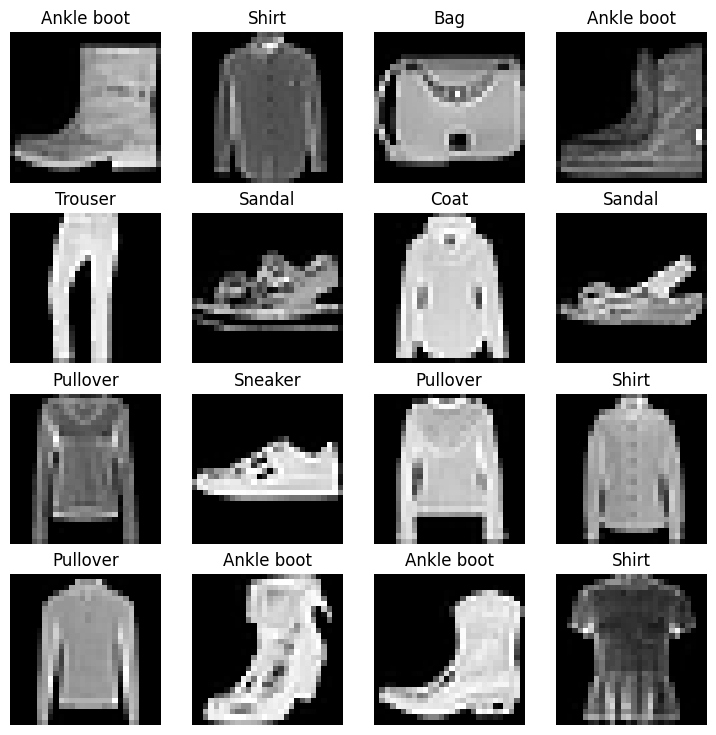

In [ ]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols +1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


# 2 Prepare Data Loader



In [ ]:
from ctypes import LittleEndianStructure
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, # train data turn into sample
                              batch_size = BATCH_SIZE,
                              shuffle = True

)

test_dataloader = DataLoader(test_data, # train data turn into sample
                              batch_size = BATCH_SIZE,
                              shuffle = False

)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train data loader {len(train_dataloader)}")
print(f"Length of test data loader {len(test_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f3edad54b50>, <torch.utils.data.dataloader.DataLoader object at 0x7f3edad54940>)
Length of train data loader 1875
Length of test data loader 313


In [ ]:
# What is inside the data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch, train_labels_batch

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


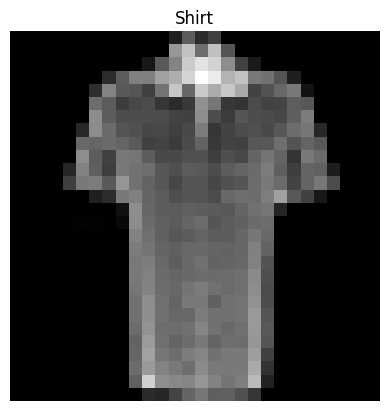

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3 First Model: Model 0 Base line

In [ ]:
# Step one build the baseline model the most basic model


# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules functions

# get a single sample from data
x = train_features_batch[torch.randint(0, len(train_features_batch),(1,1))]

# Flatten the sample
output = flatten_model(x)

# Print Statements
print(f"Shape before flattening {x.shape} ")
print(f"Shape before flattening {output.shape} ")

Shape before flattening torch.Size([1, 1, 1, 28, 28]) 
Shape before flattening torch.Size([1, 784]) 


In [ ]:
from torch import nn

class FashionMISTModelV0(nn.Module):

  def __init__(self, input_shape: int, hidden_units:int, output: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten into a vector form
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output)

    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
# image is 28 X 28 therefore the input features is 784

IN_FEATURES = 28 * 28
HIDDEN_UNITS = 10
OUT_FEATURES = len(class_names)

torch.manual_seed(42) # set seed

# need to set up model with parameters - define the class
model_0 = FashionMISTModelV0(input_shape = IN_FEATURES,
                             hidden_units = HIDDEN_UNITS,
                             output = OUT_FEATURES
                             )

model_0.to("cpu") # keep model on cpu to begin with

FashionMISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

Set up loss and optimiser

In [ ]:
import requests
from pathlib import Path

# Download helper functios from Learn pytorch if not avaiable
if Path("helper_functions.py").is_file():
  print("File already exists, skipping download")

else:
  print("Downloading helper_function.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

File already exists, skipping download


In [ ]:
from helper_functions import accuracy_fn

# Set up loss functions and optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)


Creating a function to time our experimens

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
  total_time = end - start
  print(f"Train time on {device}: {total_time :.3f} seconds")
  return total_time

Creating a training loop and training a model on batches of data

In [ ]:
from tqdm.auto import tqdm

# Train loop

epochs = 3

# set randome seed
torch.manual_seed(42)
train_time_start_on_cpu = timer()
train_loss = 0

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  # Traininng
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1 Forward pass on a batch
    y_pred = model_0(X)

    # 2 Calculate loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate loss for each batch

    # 3 Optimise zero grad
    optimiser.zero_grad()

    # 4 Loss backward
    loss.backward()

    # 5 Optimiser step
    optimiser.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/ {len(train_dataloader.dataset)}")

  # Average train loss
  train_loss/= len(train_dataloader)


  # tesing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:

      # Forward pass
      test_pred = model_0(X)

      # Accuracy and loss for test
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                          y_pred = test_pred.argmax(dim=1))

    # Average per batch
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-----
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss: 0.47665 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-----
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss: 0.45529 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 37.673 seconds


Evaluate model

The below is function which returns a dictionary of model outputs for a class model - this is for model evaluation

Set up device agnostic code for using GPU when avaiable

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):

  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

  loss, acc = 0, 0 # intialis variables
  model.eval()
  with torch.inference_mode():
      for X, y in data_loader:

        # Send to target device
        X, y = X.to(device), y.to(device)
        #Make predictions with model
        model.to(device)
        y_pred = model(X)

        #Accumulate the loss and accuracy functions
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true = y,
                          y_pred = y_pred.argmax(dim=1))# For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)


      # scale loss to find average per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model is a class
          "model_loss": loss.item(),
          "model_acc": acc
          }
# Calculate model 0 results on test data
model_0_results = eval_model(model=model_0,
                             data_loader= test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 4 Model 2 - Non Linear model

Build a model with non-linarity

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # turn into a single vector
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape),
        nn.ReLU()
    )


  def forward(self, x):
    return self.layer_stack(x)

Input shape = 784 - this is the input shape of the images
Hidden units = 10 - Start small to see how well it fits

In [ ]:
# Initialise Values of the model for non-linear model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=IN_FEATURES,
                             hidden_units=HIDDEN_UNITS,
                             output_shape= OUT_FEATURES  # Number of different classes
                             ).to(device)  # run model on device

# Check model device
print(next(model_1.parameters()).device)


cuda:0


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong model is
optimiser = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1) #Works out correct step for our model



# 4.1 Creating a Function for our training and test loop

For the train loop we create a function called train_step() to perform the loop

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimiser: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """This function runs the training loop for a pytorch data model using a data loader
  the inputs are as follows:
  model: Pytorch model being used - torch.nn.Module
  data_loader: torch.utils.data.DataLoader
  loss_fn: torch.nn.Module
  optimiser: torch.optim.Optimizer
  accuracy_fn - function to measure accuracy
  device:

  This function will out put and print the train loss for the test and optimise
  the model

  """

  train_loss, train_acc = 0, 0 # Intialize train loss and acc
  model.to(device) # Device agnostic code

  for batch, (X, y) in enumerate(data_loader):
    # Send data to device
    X, y = X.to(device), y.to(device)
    model.train()

    # 1 Forward pass on the model
    y_pred = model(X)

    # 2 Calculate loss and acc
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1)) # argmax goes from logits to predictions

    # 3 Optimiser Zero grad
    optimiser.zero_grad()

    # 4 Loss backward
    loss.backward()

    # 5 Optimiser step
    optimiser.step()

  # Calculate loss and accuracy per epoch and print
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:torch.device = device):
  # Set model to eval mode
  model.eval()

  # Intialise loss and acc
  test_loss, test_acc = 0, 0
  model.to(device)

  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to GPU/ device
      X, y = X.to(device), y.to(device)

      # Forward pass
      test_pred = model(X)

      # Calculate loss and acc for test
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim=1) # logits to predition labels
      )

    # Average test loss and test accuracy
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # Print statements
    print(f"Test Loss: {test_loss:.5f}; Test Accuracy: {test_acc:.2f}%")







Loop through each each of these functions for as many epochs as needed

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n -------------")
  train_step(data_loader = train_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             optimiser = optimiser,
             accuracy_fn = accuracy_fn
             )
  test_step(data_loader = test_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn
  )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 -------------
Train Loss: 1.09199, Train Acc: 61.34%
Test Loss: 0.95636; Test Accuracy: 65.00%
Epoch: 1
 -------------
Train Loss: 0.78101, Train Acc: 71.93%
Test Loss: 0.72227; Test Accuracy: 73.91%
Epoch: 2
 -------------
Train Loss: 0.67027, Train Acc: 75.94%
Test Loss: 0.68500; Test Accuracy: 75.02%
Train time on None: 29.984 seconds


Comparing Model 0 to Model 1
Model 0 performs better with a test Accuracy of 83.43

Non linear model actually performs worse than the linear model with an accuracy of 76%

This looks like the non-linear model is over fitting to the dimensions of the train data and thus is performing worse on the unseen test data



In [ ]:
# Create model 1 dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn = accuracy_fn)
print(f"Model 0 {model_0_results} \n Model 1: {model_1_results}")

Model 0 {'model_name': 'FashionMISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499} 
 Model 1: {'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}


# 5 Buidling a ConvolutionalBuidling a Convoluational Neural Network (CNN)

In [ ]:
# Creating a class for the convolutional neaural nework

class FashionMISTModelV2(nn.Module):

  """
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/

  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels=hidden_units,
                  kernel_size= 3, # how big is the square that is going over the image
                  stride = 1, # default value
                  padding = 1), # options = valid

        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)  # default stride value is same as kernel_size
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2) # default stride will be 2

    )

    self.classifier = nn.Sequential(
        nn.Flatten(), # Makes the out put into a vector
        # It's because each layer of our network compresses and changes the shape of our inputs data.,
        nn.Linear(in_features = hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    #print(f"Output shape of block 1 {x.shape}")
    x = self.block_2(x)
    #print(f"Output shape of block 2 {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of Classifer {x.shape}")
    return x


model_2 = FashionMISTModelV2(input_shape = 1,
                             hidden_units = 10,
                             output_shape = len(class_names)).to(device)

model_2

FashionMISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Stepping through the Conv2d

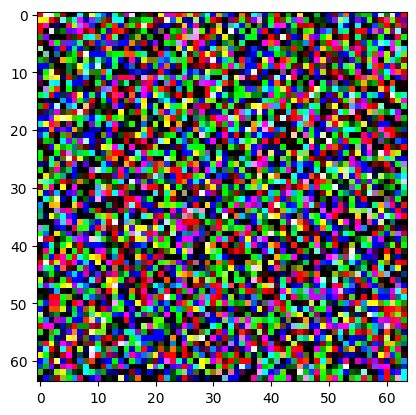

In [ ]:
# Step through each of these
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

# Convert the sliced tensor to a NumPy array
test_image_numpy = test_image.numpy()

# Display the image using imshow
plt.imshow(test_image_numpy.transpose(1, 2, 0))
plt.show()

In [ ]:
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [ ]:
# Create single Conv2d layer

conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels=10,
                       kernel_size = 3,
                       stride=1,
                       padding=0
                       )

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

Stepping through Maxpool 2d

In [ ]:
#print out original image shape without and with unsqueezed data
print(f"Test image original shape {test_image.shape}")
print(f"Test image unsqueezed shape {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.Maxpool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size = 3)

# pass data through Conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")


# Pass through the Maxpool 2d and print shape after this
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape torch.Size([3, 64, 64])
Test image unsqueezed shape torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 20, 20])


Currently Halving the shape from 61x61 to 32x32

Kernel - 3 take this to 20x20 which is almost 1/3 of the orginal size

Now to try this with a smaller original tensor

In [ ]:
torch.manual_seed(42)

# Create random tensor
random_tensor = torch.randn(size=(1, 1, 2, 2))

print(f"Random Tensor: \n{random_tensor}")
print(f"Random Tensor Shape: {random_tensor.shape}")


# Create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\n Max Pool Tensor: {max_pool_tensor}")
print(f"\n Max Pool Tensor Shape: {max_pool_tensor.shape}")

Random Tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor Shape: torch.Size([1, 1, 2, 2])

 Max Pool Tensor: tensor([[[[0.3367]]]])

 Max Pool Tensor Shape: torch.Size([1, 1, 1, 1])


# 5.1 Running the CNN model on the data

Set up loss function and optimiser to run Model 2

In [ ]:
model_2 = FashionMISTModelV2(input_shape = 1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)




In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [ ]:
# Building the training loop using functions pre defined here in

torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer() # start time

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  # Perform train step function
  train_step(model = model_2,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             accuracy_fn=accuracy_fn,
             optimiser = optimiser)



  test_step(model = model_2,
            data_loader = test_dataloader,
            accuracy_fn = accuracy_fn,
            loss_fn=loss_fn)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.71827, Train Acc: 73.48%
Test Loss: 0.41230; Test Accuracy: 85.21%
Epoch: 1
---------
Train Loss: 0.37686, Train Acc: 86.38%
Test Loss: 0.38105; Test Accuracy: 86.30%
Epoch: 2
---------
Train Loss: 0.33755, Train Acc: 87.81%
Test Loss: 0.33826; Test Accuracy: 88.02%
Train time on cuda: 37.085 seconds


In [ ]:
# get model 2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

# 6 Comparing Models



1.   Model 0 - Base line model with nn.
2.   Model 1 - Base Model but with ReLU
3.   Model 2 - Convolutional Neaural Network (CNN)


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMISTModelV2,0.338258,88.019169


Now we can add the training times too

In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMISTModelV0,0.476639,83.426518,37.673005
1,FashionMNISTModelV1,0.685001,75.019968,29.984216
2,FashionMISTModelV2,0.338258,88.019169,37.085426


### Performance-speed tradeoff

Something to be aware of in machine learning is the **performance-speed** tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with `model_2`).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

Text(0, 0.5, 'Model')

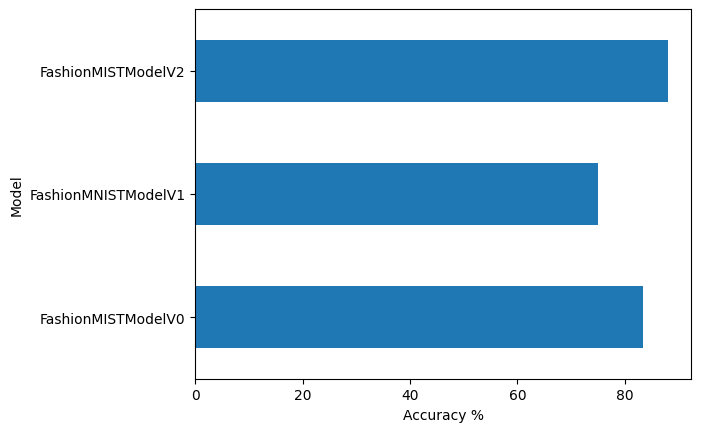

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy %")
plt.ylabel("Model")

# 7 Make predictions with the best model

Create a function to make predictions with random sample of data


In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare data (add dimension and pass through device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logit = model(sample)

      # get prediction proability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off GPU for matplotlib
      pred_probs.append(pred_prob.cpu())


  # Stack pred_preds to turn list into tensor
  return torch.stack(pred_probs)



In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels =[]

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first samples
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

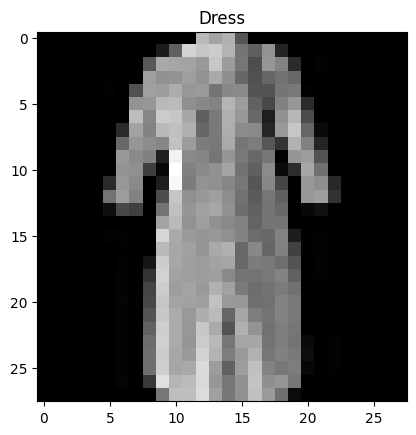

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make Predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

#view first two predictions prob
pred_probs[:2]

tensor([[9.9157e-03, 2.8966e-05, 1.0831e-04, 9.8389e-01, 1.5691e-03, 1.4633e-08,
         4.2596e-03, 1.7997e-06, 2.2521e-04, 2.9884e-08],
        [2.1790e-01, 3.2752e-05, 7.0581e-03, 4.5621e-03, 7.9540e-05, 5.8130e-07,
         7.7032e-01, 6.1430e-06, 3.8514e-05, 2.7970e-07]])

In [ ]:
# Convert pred probs into the labels
pred_classess = pred_probs.argmax(dim = 1)
pred_classess, test_labels

(tensor([3, 6, 4, 5, 4, 1, 3, 8, 1]), [3, 6, 4, 5, 4, 1, 3, 8, 1])

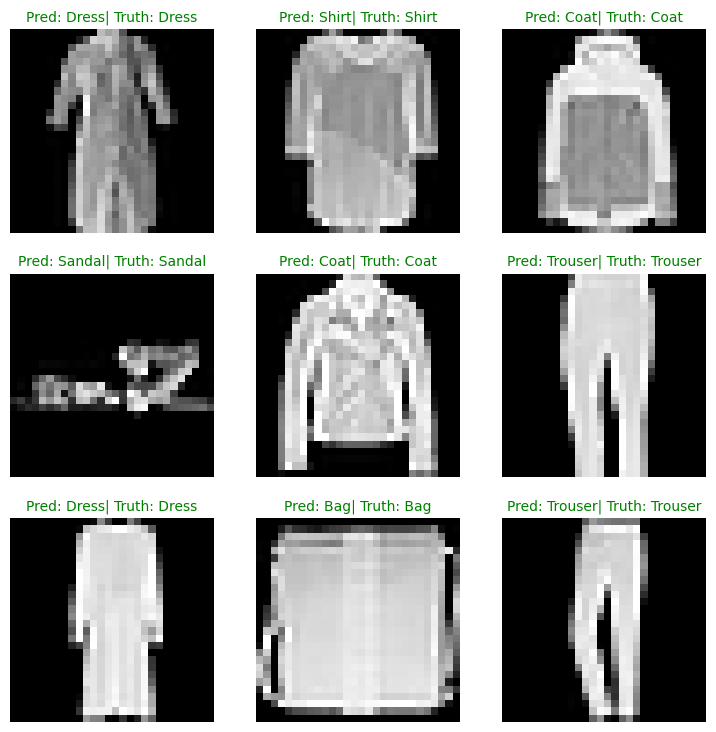

In [ ]:
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #Create Subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  pred_label = class_names[pred_classess[i]]

  # get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label}| Truth: {truth_label}"

  # Check for equality
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g") # gree if correct
  else:
    plt.title(title_text, fontsize = 10, c = "r") # gree if correct

  plt.axis(False)

# 8 Confusion Matrix for model



*   Make Predictions on our trained model on the test data
*   Torch. Classification metrics
*   Plt Confusion matrix using mlextend plot confusion matrix


In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm
# 1. Make predictions with trained model

y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):

    # Send data to target device
    X, y = X.to(device), y.to(device)

    # Do forward pass
    y_logit = model_2(X)

    # Convert logit to pred prob
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

    # Put predictions on CPU
    y_preds.append(y_pred.cpu())


  # Concatinate predictions
  # print(y_preds)
  y_preds_tensor = torch.cat(y_preds)
  y_preds_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.0


In [ ]:
len(class_names)

10

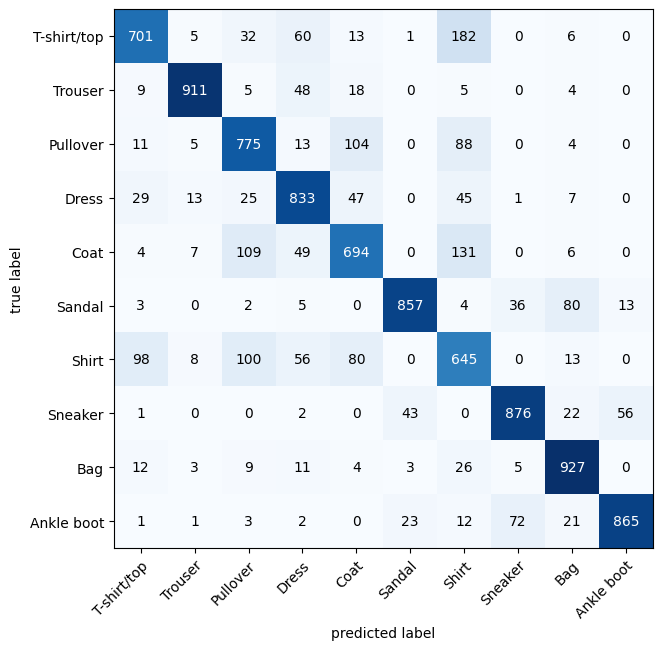

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Set up confusion matrix
confmat = ConfusionMatrix(task = 'multiclass', num_classes = int(len(class_names)))
confmat_tensor = confmat(preds=y_preds_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), #matplot lib likes numpy
    class_names = class_names,
    figsize = (10, 7)
)

# 9 Save and Load best model

In [ ]:
from pathlib import Path

# Create model path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create Model Save
MODEL_NAME = "03_pytorch_computervisions_model_2"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model to the created directory above
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to: models/03_pytorch_computervisions_model_2


In [ ]:
# Create a new instance of the model
torch.manual_seed(42)

loaded_model_2 = FashionMISTModelV2(input_shape = 1,
                                    hidden_units = 10,
                                    output_shape = len(class_names))

# Load in the Save model Dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


# Send model to device
loaded_model_2.to(device)

FashionMISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#Evaluate model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

loaded_model_2_results,

({'model_name': 'FashionMISTModelV2',
  'model_loss': 0.3382578492164612,
  'model_acc': 88.01916932907348},)

In [ ]:
model_2_results

{'model_name': 'FashionMISTModelV2',
 'model_loss': 0.3382578492164612,
 'model_acc': 88.01916932907348}

In [ ]:
# Check that these are close for the loss
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)

# 10 Excercises

In [ ]:
# import torch
# from torch import nn

# # import torchvision
# import torchvision
# from torchvision import datasets
# from torchvision.transforms import ToTensor




In [ ]:
# train_data = datasets.MNIST(
#     root = "data",
#     train = True,
#     download = True,
#     transform = ToTensor()

# )

# test_data = datasets.MNIST(
#     root = "data",
#     train = False,
#     download = True,
#     transform = ToTensor()
# )

In [ ]:
# img, label = train_data[0]

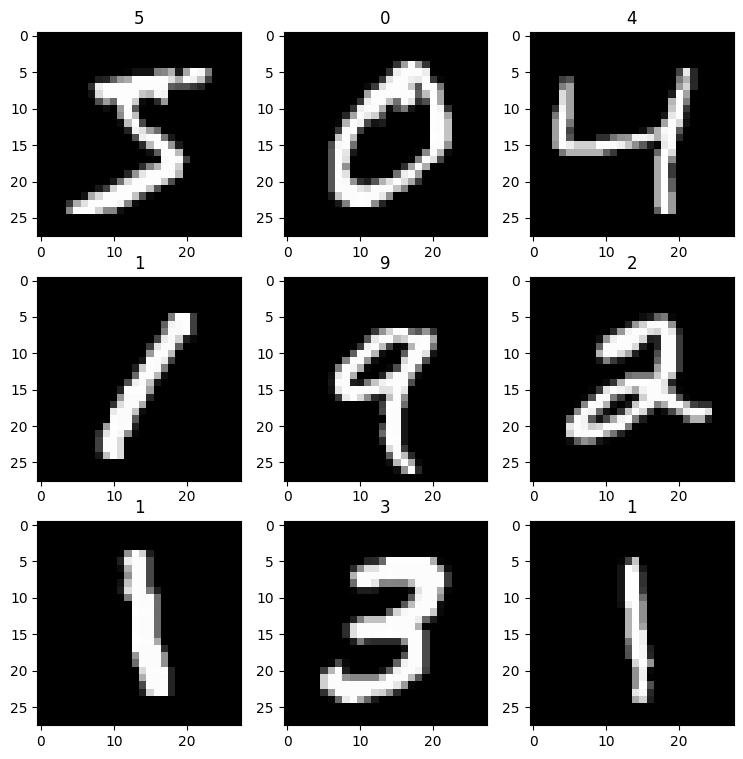

In [ ]:
# plt.figure(figsize = (9,9))
# nrows = 3
# ncols = 3

# for i in range(9):
#   img, label = train_data[i]


#   plt.subplot(nrows, ncols, i+1)

#   plt.imshow(img.squeeze(), cmap = "gray")
#   plt.title(f"{label}")

In [ ]:
# from torch.utils.data import DataLoader
# train_dataloader = DataLoader(train_data,
#                               batch_size = 32,
#                               shuffle = True)
# test_dataloader = DataLoader(test_data,
#                              batch_size = 32,
#                              shuffle = False)



In [ ]:
# class_names = train_data.classes
# class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
# for sample in next(iter(train_dataloader)):
#   print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
# len(train_dataloader), len(test_dataloader)

(1875, 313)

# 10.1 Creating the First CNN Model

Create a CNN model based on the CNN Explainer Website

In [ ]:
# class MNISTModelCNN(torch.nn.Module):
#   def __init__(self, input_shape:int,
#                hidden_units: int,
#                output_shape: int):
#     super().__init__()
#     self.block_1 = nn.Sequential(
#         nn.Conv2d(in_channels = input_shape,
#                   out_channels = hidden_units,
#                   kernel_size = 3,
#                   stride = 1,
#                   padding = 1),
#         nn.ReLU())

#     self.block_2 = nn.Sequential(
#         nn.Conv2d(in_channels = hidden_units,
#                   out_channels=hidden_units,
#                    kernel_size = 3),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size = 2)
#     )

#     self.block_3 = nn.Sequential(
#         nn.Conv2d(in_channels = hidden_units,
#                   out_channels = hidden_units,
#                    kernel_size = 3),
#         nn.ReLU()
#     )
#     self.block_4 = nn.Sequential(
#         nn.Conv2d(in_channels = hidden_units,
#                   out_channels = output_shape,
#                    kernel_size = 3),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size = 2)
#     )
#     self.classifier = nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(in_features=hidden_units*16, # this is from trial and error this is the output shape after the flatten call is made
#                   out_features=output_shape)
#     )

#   def forward(self, x):
#     x = self.block_1(x)
#     #print(f"Output shape after block 1 = {x.shape}")
#     x = self.block_2(x)
#     #print(f"Output shape after block 2 = {x.shape}")
#     x = self.block_3(x)
#     #print(f"Output shape after block 3 = {x.shape}")
#     x = self.block_4(x)
#     #print(f"Output shape after block 4 = {x.shape}")
#     x = self.classifier(x)
#     #print(f"Output shape after classifier = {x.shape}")
#     return x



Train Model on CPU

In [ ]:
# model = MNISTModelCNN(input_shape = 1,
#                       hidden_units = 10,
#                       output_shape = 10).to(device)
# model



MNISTModelCNN(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (block_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [ ]:
# # Understanding the output after flatten
# flatten_x = nn.Flatten()
# dummy_v = torch.rand(size=(1, 10, 4, 4))
# dummy_x2 = flatten_x(dummy_v).to(device)
# dummy_x2.shape

torch.Size([1, 160])

In [ ]:
# try a dummy forward pass before train data - check if shape matches

# dummy_x = torch.rand(size = (1, 28, 28)).unsqueeze(dim=0).to(device)

# model(dummy_x)

tensor([[-0.0096, -0.0895,  0.0406,  0.0730, -0.0912,  0.0104,  0.0393, -0.0064,
          0.0322, -0.0227]], device='cuda:0', grad_fn=<AddmmBackward0>)

Training the data for 5 Epochs on new model - on CPU


In [ ]:
# %%time
# from tqdm.auto import tqdm
# from datetime import time


# # train on cpu
# model_cpu = MNISTModelCNN(
#     input_shape = 1,
#     hidden_units = 10,
#     output_shape = 10).to("cpu")

# # Create a loss function and optimizer
# loss_fn = nn.CrossEntropyLoss()
# optimiser = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

# epochs = 5

# for epoch in tqdm(range(epochs)):

#   train_loss = 0 # intialise the variable

#   # loop through the training dataloader
#   for batch, (X, y) in enumerate(train_dataloader):

#     model_cpu.train() # intialise the model to train mode

#     # put data on CPU
#     X, y = X.to("cpu"), y.to("cpu")

#     # Forward pass
#     y_pred = model_cpu(X)

#     # Loss Calc
#     loss = loss_fn(y_pred, y)
#     train_loss += loss

#     #Optimiser reset grad
#     optimiser.zero_grad()

#     # Loss backwards
#     loss.backward()

#     # Optimiser step
#     optimiser.step()

#   # Adjust training loss for average
#   train_loss /= len(train_dataloader)


#   #testing loop

#   test_loss_total = 0
#   test_acc = 0

#   model_cpu.eval()

#   with torch.inference_mode():
#     for batch, (X_test, y_test) in enumerate(test_dataloader):

#       # put test data on CPU
#       X_test, y_test = X_test.to("cpu"), y_test.to("cpu")

#       # Forward pass
#       test_pred = model_cpu(X_test)
#       test_loss = loss_fn(test_pred, y_test)

#       test_loss_total =+ test_loss

#       # Compute Accuracy
#       test_acc += accuracy_fn(y_true = y_test,
#                             y_pred = test_pred.argmax(dim=1))

#     # Calculate average test loss score
#     test_loss_total /= len(test_dataloader)
#     test_acc /= len(test_dataloader)
#   print(f"Epoch: {epoch}| Train Loss:{train_loss:3f} | Test Loss {test_loss_total:3f} | Acc: {test_acc:2f}%")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0| Train Loss:0.324599 | Test Loss 0.000007 | Acc: 96.964856%
Epoch: 1| Train Loss:0.080023 | Test Loss 0.000012 | Acc: 98.013179%
Epoch: 2| Train Loss:0.063456 | Test Loss 0.000017 | Acc: 97.883387%
Epoch: 3| Train Loss:0.054939 | Test Loss 0.000003 | Acc: 98.332668%
Epoch: 4| Train Loss:0.048832 | Test Loss 0.000002 | Acc: 98.622204%
CPU times: user 3min 15s, sys: 395 ms, total: 3min 15s
Wall time: 3min 20s


Now running the same test on the GPU to compare the times

In [ ]:
# %%time
# from tqdm.auto import tqdm

# device = "cuda" if torch.cuda.is_available() else "cpu"

# # define number of epochs
# epochs = 5

# # Train on GPU
# model_gpu = MNISTModelCNN(
#     input_shape = 1,
#     hidden_units = 10,
#     output_shape = 10).to(device)

# # Create loss function, optimiser and accuracy function
# loss_fn = nn.CrossEntropyLoss()
# optimiser = torch.optim.SGD(model_gpu.parameters(), lr = 0.1)

# #Train loop
# for epoch in tqdm(range(epochs)):

#   train_loss = 0 # intilise variable for train loss
#   model_gpu.train() # set model to train mode

#   for batch, (X, y) in enumerate(train_dataloader):


#     # put X and y onto Device
#     X, y = X.to(device), y.to(device)
#     # Forward pass
#     y_pred = model_gpu(X)

#     # Calulate loss
#     loss =+ loss_fn(y_pred, y)
#     train_loss += loss

#     # Optimiser Zero grad
#     optimiser.zero_grad()

#     # Loss Backward
#     loss.backward()

#     # Optimiser step
#     optimiser.step()

#   #Adjust training loss with number of batches
#   train_loss /= len(train_dataloader)

#   #Testing loop

#   model_gpu.eval() # evaluation mode
#   test_loss_total = 0
#   test_acc = 0
#   with torch.inference_mode():

#     for batch, (X_test, y_test) in enumerate(test_dataloader):

#       # Place X_test and y _test on device
#       X_test, y_test = X_test.to(device), y_test.to(device)
#       # Forward pass
#       test_pred = model_gpu(X_test)

#       #Calculae loss
#       test_loss = loss_fn(test_pred, y_test)
#       test_acc += accuracy_fn(y_test,
#                               test_pred.argmax(dim=1))

#       test_loss_total += test_loss

#     # Adjust loss per batch
#     test_loss_total /= len(test_dataloader)
#     test_acc /= len(test_dataloader)

#   print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f} | Acc: {test_acc:.2f}%")




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.497 | Test loss: 0.091 | Acc: 97.00%
Epoch: 1 | Loss: 0.095 | Test loss: 0.071 | Acc: 97.73%
Epoch: 2 | Loss: 0.074 | Test loss: 0.069 | Acc: 97.80%
Epoch: 3 | Loss: 0.063 | Test loss: 0.053 | Acc: 98.22%
Epoch: 4 | Loss: 0.057 | Test loss: 0.057 | Acc: 98.17%
CPU times: user 59.7 s, sys: 490 ms, total: 1min
Wall time: 1min


Run predictions on samples of data and plot them